Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         309 non-null    float64
 2   Weight_g          323 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 20.8+ KB
分群準確性： 90552634.32746337


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[1641926789.4533336, 415436349.50082266, 209702772.03664708, 90552634.32746337, 56200098.85929561, 37231642.701509684, 26829643.48503175, 19321728.526602253, 14403482.996412124, 11569417.820482358, 9871875.440504534, 8371696.731054683, 7222660.388801662, 6182940.05541355]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


分群預測結果： [1]


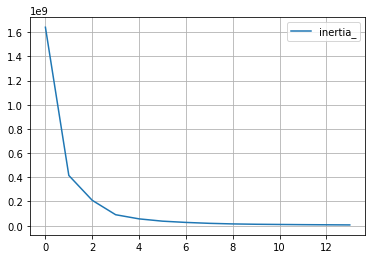

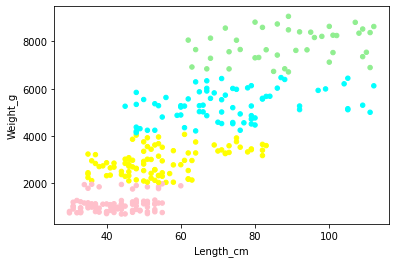

In [ ]:
from google.colab import drive
from sklearn.cluster import KMeans
drive.mount("/content/drive")
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/機器學習/penguin.csv")

df=df.drop_duplicates()
df.info()
df=df.dropna()
df.reset_index(drop=True)
a_dic={'Chinstrap penguin':0, 'Little penguin':1, 'Galapagos penguin':2, 'Gentoo penguin':3}
df['Species']=df['Species'].map(a_dic)


df_x=df[['Length_cm', 'Weight_g']]

a=4
km=KMeans(n_clusters=a)
km.fit(df_x)
print('分群準確性：',km.inertia_)

listx=[]
r=range(1,15)
for num in r:
  km=KMeans(n_clusters=num)
  km.fit(df_x)
  listx.append(km.inertia_)
print(listx)

df_kmeans=pd.DataFrame()
df_kmeans['inertia_']=listx
df_kmeans.plot(grid=True)

num=4
km=KMeans(n_clusters=num)
km.fit(df_x)
pred=km.fit_predict(df_x)

df=df_x.copy()
df['pred']=pred
c_dic={0:'lightgreen', 1:'pink', 2:'aqua', 3:'yellow'}
df['colors']=df['pred'].map(c_dic)
df.plot(kind='scatter', x='Length_cm', y='Weight_g', c=df['colors'])

list2=[[52,1234]] 
value=km.predict(list2) 

print("分群預測結果：",value)

第二題

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-34ae62a650f6>:62: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colors=df.pred.map(c_dic)
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, bu

分群預測結果：v1為(yellow群), v2為(lightgreen群)


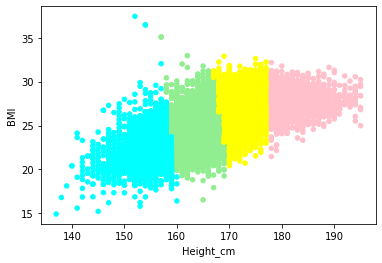

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

from google.colab import drive

drive.mount("/content/drive")
df=pd.read_csv('/content/drive/MyDrive/機器學習/ShoeSize.csv')


df.drop_duplicates()

df_null=df[df['Shoe size_cm'].isnull()]
df=df.drop(df_null.index)

df_hnull=df[df.Height_cm.isnull()]
for i in range(len(df_hnull)):
  index=df_hnull.index
  gender=df_hnull.iloc[i,1]
  weight=df_hnull.iloc[i,3]
  size=df_hnull.iloc[i,4]
  avg=(df[(df.Gender==gender) & (df.Weight_kg==weight) & (df['Shoe size_cm']==size)].Height_cm).mean()
  df.iloc[index[i],2]=avg

df_wnull=df[df.Weight_kg.isnull()]

for i in range(len(df_wnull)):
  index=df_wnull.index
  gender=df_wnull.iloc[0,1]
  height=df_wnull.iloc[0,2]
  size=df_wnull.iloc[0,4]
  avg=(df[(df.Gender==gender) & (df.Height_cm==height) & (df['Shoe size_cm']==size)].Weight_kg).mean()
  df.iloc[index[i],3]=avg
# df.info()

df=df.reset_index(drop=True)

g_dic={'Female':0, 'Male':1}
df.Gender=df.Gender.map(g_dic)
z=df.iloc[:,4]
df.iloc[:,4]=z.astype(int)

hei=df.Height_cm
wei=df.Weight_kg
bmi=round(wei/(hei*hei/10000),2)
df['BMI']=bmi

df_x=df[['Gender', 'Height_cm', 'BMI']]


k=4
km=KMeans(n_clusters=k)
km.fit(df_x)
pred=km.fit_predict(df_x)


df=df_x.copy()
df['pred']=pred
c_dic={0:'lightgreen', 1:'pink', 2:'aqua', 3:'yellow'}
df.colors=df.pred.map(c_dic)
df.plot(kind='scatter', x='Height_cm', y='BMI', c=df.colors)



new1=[[0,176,24.85]]
new2=[[1,162,20.19]]
v1=km.predict(new1)
v2=km.predict(new2)

print("分群預測結果：v1為({}群), v2為({}群)".format(c_dic.get(v1[0],''),c_dic.get(v2[0],'')))

In [ ]:
# list1=[1.5,2.2,3.3,4.3,5.5]
# for i in list1:
#   print(round(i))
# a=5.5
# print(int(a))
phone = pd.Series(["Apple", "Samsung", "Mi", "Sony"])
for i in phone.values:
  print(i)

Apple
Samsung
Mi
Sony
